In [1]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

# Agglomerative Clustering

In [2]:
Airdata = pd.read_csv("EastWestAirlines.csv")
Airdata.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [4]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(Airdata.iloc[:,1:])
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


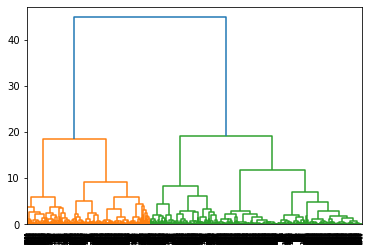

In [5]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='ward'))

In [6]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')

In [7]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
y_hc

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [8]:
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters.head(10)

,Clusters
0,0
1,0
2,0
3,0
4,3
5,0
6,2
7,1
8,1
9,1


In [9]:
Airdata['h_clusterid'] = hc.labels_

In [10]:
Airdata

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [11]:
Airdata.groupby('h_clusterid').agg(['mean']).reset_index()

,h_clusterid,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2312.702339,37876.890058,52.797076,1.000000,1.019883,1.000585,2558.508187,5.730994,239.314035,0.697076,3562.376608,0
1,1,1889.710359,79848.233615,285.097252,1.699789,1.024313,1.000000,12079.774841,12.133192,781.939746,2.369979,4372.173362,1
2,2,1877.870050,106221.111386,161.262376,3.198020,1.001238,1.025990,26458.257426,16.363861,198.733911,0.558168,4367.250000,0
3,3,1490.760748,127475.028037,160.801869,4.362617,1.000000,1.050467,58656.919626,22.235514,991.110280,3.005607,5072.226168,1


# K-Means Clustering

In [12]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [13]:
Airdata2 = pd.read_csv("EastWestAirlines.csv")
Airdata2.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [14]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_airdata2 = scaler.fit_transform(Airdata2.iloc[:,1:])

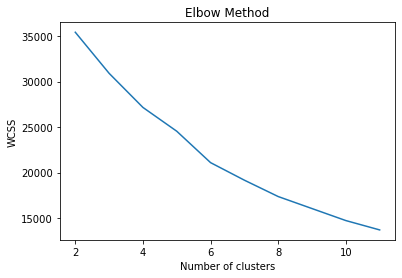

In [15]:
wcss = []
for i in range(2, 12):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(scaled_airdata2)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(2, 12), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [16]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(6, random_state=42)
clusters_new.fit(scaled_airdata2)

KMeans(n_clusters=6, random_state=42)

In [17]:
clusters_new.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [18]:
#Assign clusters to the data set
Airdata2['clusterid_new'] = clusters_new.labels_

In [19]:
#these are standardized values.
clusters_new.cluster_centers_

array([[-3.00848909e-01, -1.31146780e-01, -6.13491098e-01,
        -9.82418871e-02, -6.06935238e-02, -5.22951732e-01,
        -5.02877272e-01, -1.78760113e-01, -1.93256108e-01,
        -2.06496348e-01, -3.52919418e-01],
       [ 4.25166743e-01, -1.09383800e-01,  1.18102682e+00,
        -9.82418871e-02, -5.47312520e-02,  8.94718692e-01,
         7.42329011e-01, -7.97572170e-02, -8.75431581e-02,
         3.72806369e-01,  5.61665047e-01],
       [ 6.39719256e-01, -8.44329231e-02,  1.02208440e+00,
        -9.82418871e-02,  1.56462993e+01,  3.17969131e+00,
         1.71461374e+00,  3.32926913e-02,  5.96953922e-02,
         2.39872612e-01,  3.37527346e-01],
       [ 1.23710416e+00,  4.94893896e-01,  2.09648714e-01,
        -9.82418871e-02, -6.27665798e-02,  7.98816977e-01,
         1.79329606e+00,  3.85383987e+00,  4.13575386e+00,
         2.84717914e-01,  9.35769278e-01],
       [ 4.45357693e-01,  6.74503311e+00, -7.95461087e-02,
        -9.82418871e-02, -6.27665798e-02,  4.72243529e-03,
  

In [20]:
Airdata2.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2241.601294,43318.631217,42.629195,1.216336,1.000000,1.000404,4526.021431,6.778002,209.615851,0.640113,3693.763850,0.199757
1,1,1597.830322,116495.663786,59.592302,3.686567,1.000000,1.001571,38786.016496,18.739199,348.940299,1.043205,4887.141398,0.642577
2,2,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
3,3,1734.266667,198255.733333,526.948148,2.348148,1.000000,1.000000,36434.637037,28.822222,5855.562963,17.059259,4706.466667,0.822222
4,4,2051.050000,118476.933333,5361.850000,1.950000,1.000000,1.000000,17258.883333,11.883333,900.466667,2.666667,3981.083333,0.550000
5,5,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349


# DB Scan Clustering

In [21]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

In [22]:
Airdata3 = pd.read_csv("EastWestAirlines.csv")
Airdata3.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [23]:
print(Airdata3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB
None


In [24]:
Airdata3.drop(['ID#','Award?'],axis=1,inplace=True)

In [25]:
array=Airdata3.values

In [26]:
array

array([[28143,     0,     1, ...,     0,     0,  7000],
       [19244,     0,     1, ...,     0,     0,  6968],
       [41354,     0,     1, ...,     0,     0,  7034],
       ...,
       [73597,     0,     3, ...,     0,     0,  1402],
       [54899,     0,     1, ...,   500,     1,  1401],
       [ 3016,     0,     1, ...,     0,     0,  1398]], dtype=int64)

In [27]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [28]:
X

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.39545434e+00],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.37995704e+00],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.41192021e+00],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31560393e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
         2.85309024e-02, -9.85033311e-02, -1.31608822e+00],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31754109e+00]])

In [29]:
dbscan = DBSCAN(eps=1, min_samples=9)
dbscan.fit(X)

DBSCAN(eps=1, min_samples=9)

In [30]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [31]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [32]:
cl

,cluster
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


In [33]:
cl.value_counts()

cluster
 0         3433
-1          542
 1           15
 2            9
dtype: int64

In [34]:
pd.concat([Airdata3,cl],axis=1)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cluster
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,0
3995,64385,0,1,1,1,981,5,0,0,1395,0
3996,73597,0,3,1,1,25447,8,0,0,1402,0
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [42]:
Airdata3['clusterid'] = cl.cluster

In [44]:
Airdata3.groupby('clusterid').agg(['mean']).reset_index()

,clusterid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,182024.488930,984.625461,2.678967,1.079336,1.090406,39401.662362,22.232472,2244.297048,6.544280,4717.784133
1,0,56816.099621,6.160501,1.969123,1.000000,1.000000,13705.785319,9.936790,180.979901,0.564812,4034.647539
2,1,26219.733333,0.000000,1.000000,2.000000,1.000000,8652.066667,12.133333,83.333333,0.266667,2856.000000
3,2,25718.888889,2388.666667,1.000000,1.000000,1.000000,2755.222222,5.666667,88.888889,0.333333,2143.888889
